In [9]:
import DyPhaSe as dp
import pandas as pd

In [10]:
gene_expression = pd.read_csv('../data/gene_expression.csv', index_col=0)
cell_types = pd.read_csv('../data/cell_types.csv', index_col=0)
dp.calculate_dyphase_score(gene_expression, 
                        cell_types, 
                        species='Mouse', output_dir='../../1209test/')

(              CT14      CT18      CT22      CT26      CT30      CT34
 Aagab     0.419984  0.864357  0.295243  0.370904  0.238333  0.431388
 Aak1      0.463889  0.857326  0.523590  0.805572  0.433035  0.900030
 Aamdc     0.462936  0.500558  0.461173  0.720079  0.448791  0.530461
 Aars      0.477291  0.837658  0.779452  0.778933  0.881134  0.361430
 Aasdhppt  0.453123  0.734181  0.360841  0.204131  0.688357  0.330610
 ...            ...       ...       ...       ...       ...       ...
 mt-Nd1    0.995991  0.998159  0.874972  0.996688  0.944672  0.996230
 mt-Nd2    0.989206  0.554514  0.543833  0.494161  0.491520  0.524895
 mt-Nd4    0.500224  0.968670  0.549834  0.497502  0.552833  0.495512
 mt-Nd5    0.938096  0.574573  0.620354  0.481060  0.697137  0.554039
 mt-Nd6    0.662807  0.272961  0.504812  0.772601  0.647402  0.792908
 
 [6240 rows x 6 columns],
               CT14      CT18      CT22      CT26      CT30      CT34      saps
 Aagab    -0.020061  0.513186 -0.169750 -0.078957 -0

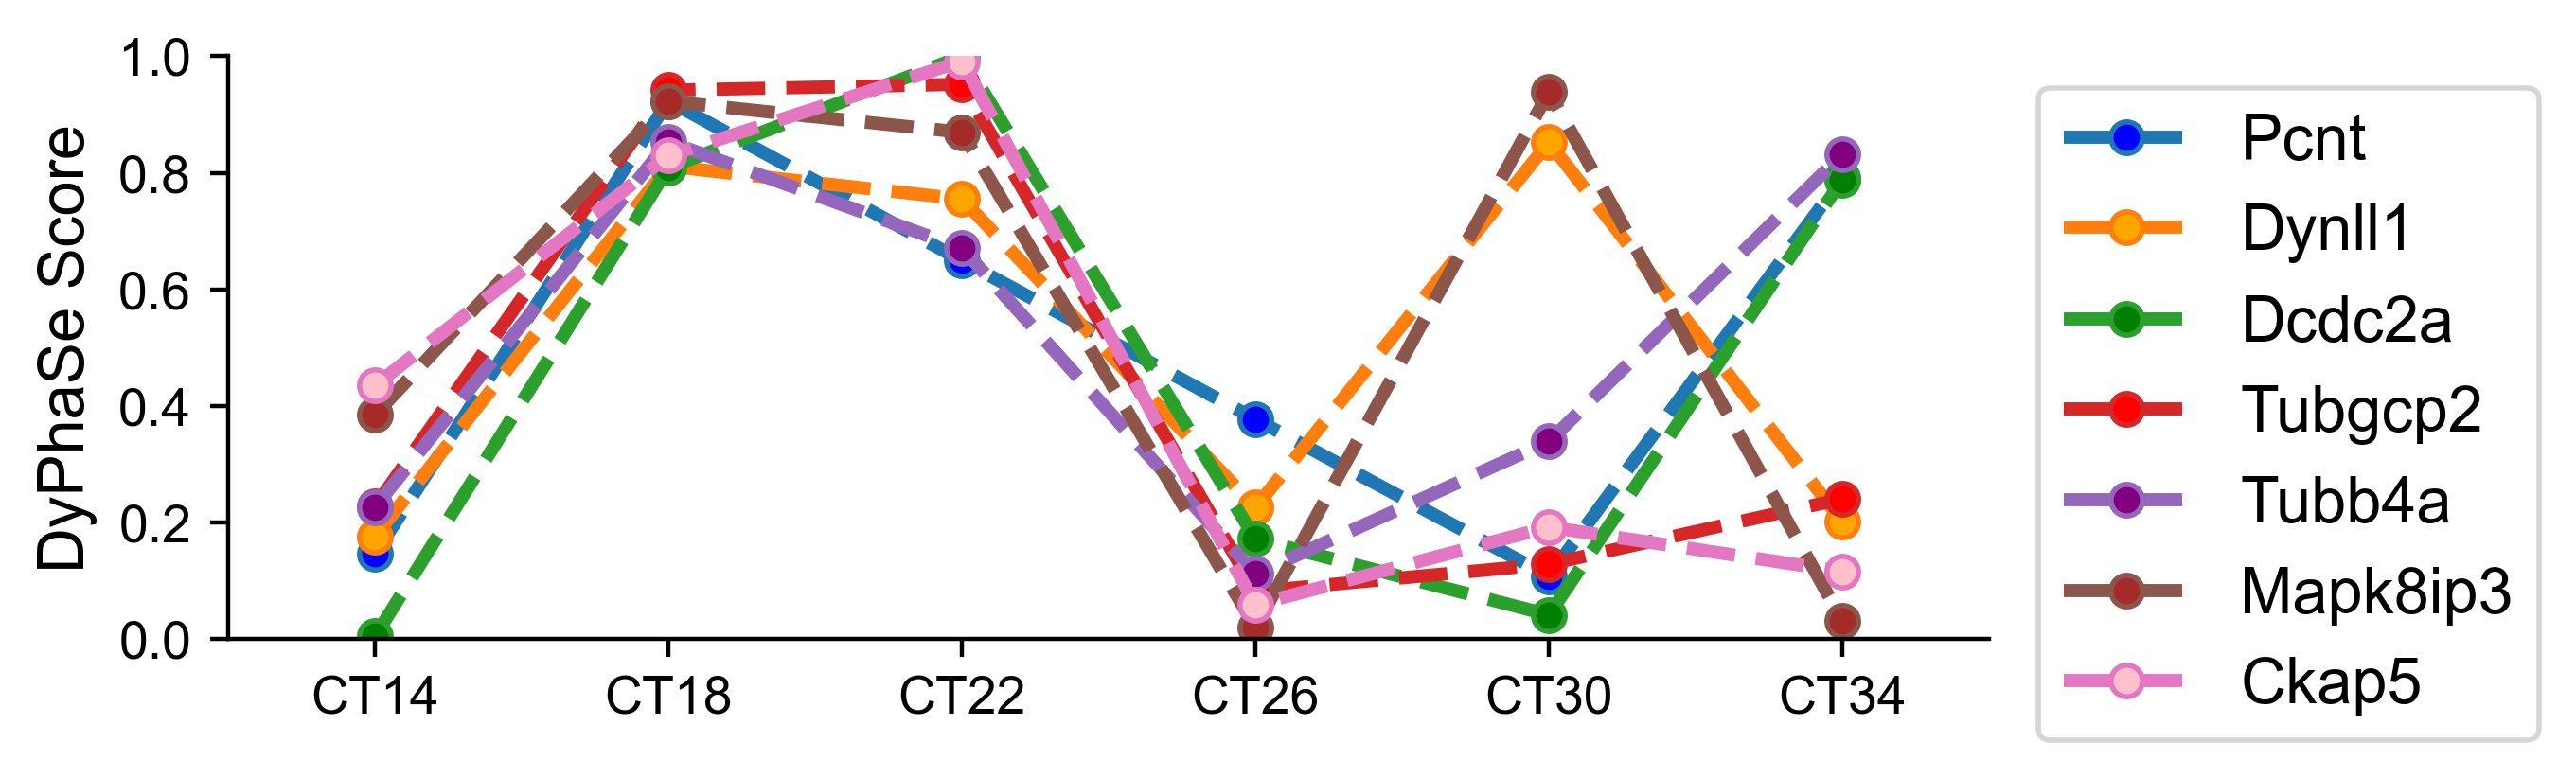

In [11]:
sta_data = pd.read_csv(f'../../1209test/DyPhaSe_scores.csv',index_col=0)
gene_list = [ 'Pcnt', 'Dynll1','Dcdc2a', 'Tubgcp2', 'Tubb4a', 'Mapk8ip3','Ckap5']
dp.plot_dyphase_change(sta_data, gene_list)

In [13]:
dp.process_trend_clustering_with_r(
    input_file="../../1209test/DyPhaSe_scores.csv",
    output_dir="../../1209test/",
    cluster_num=12,
    random_seed=123,
    cutoff=0.85, 
    r_home="/home/wyq/.conda/envs/R442/lib/R",  
    r_user="/home/wyq/.conda/envs/R442/lib/R/library" 
)

R[write to console]: 载入需要的程序包：tcltk



R[write to console]: 载入需要的程序包：DynDoc

R[write to console]: 此外: 
R[write to console]: 警告信息:

R[write to console]: 1: 程序包‘widgetTools’是用R版本4.4.2 来建造的 

R[write to console]: 2: 没有DISPLAY变量，因此没有Tk这个功能 

R[write to console]: 3: 程序包‘tkWidgets’是用R版本4.4.2 来建造的 

R[write to console]: 4: 程序包‘DynDoc’是用R版本4.4.2 来建造的 



[1] 3531    6
0 genes excluded.
0 genes excluded.


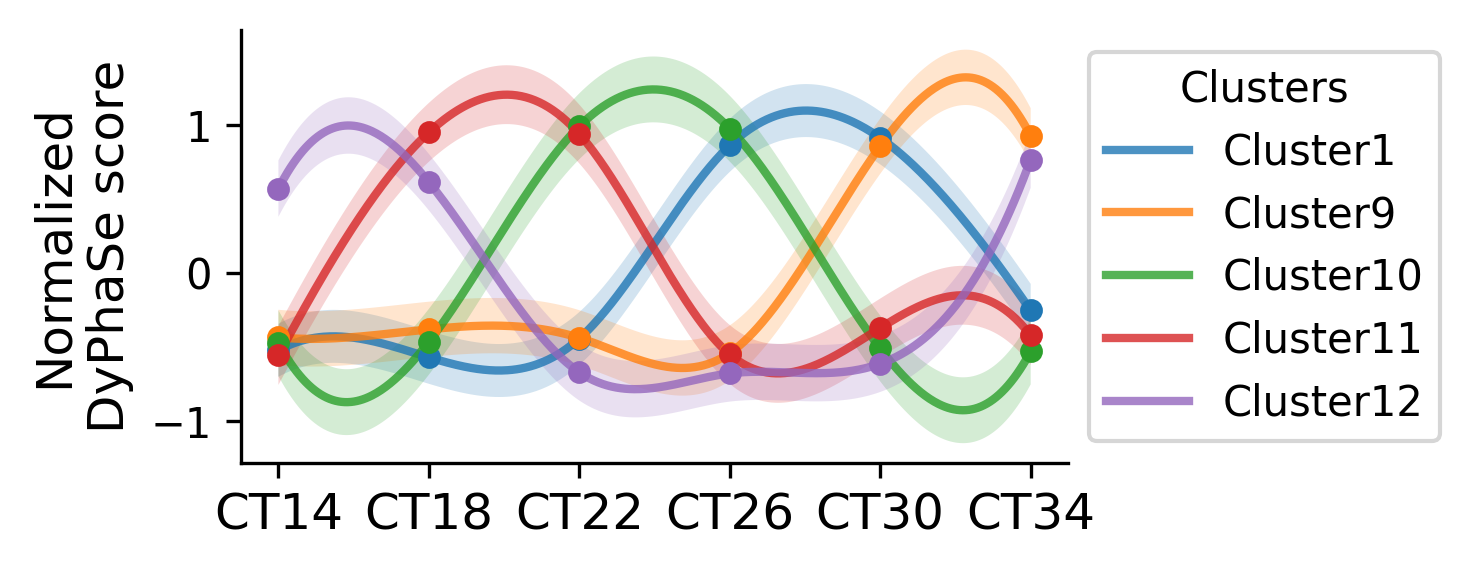

In [18]:
centers = pd.read_csv('../../1209test/mfuzz-result-centers.csv', index_col=0)
centers.index = ['Cluster1','Cluster2','Cluster3','Cluster4','Cluster5','Cluster6','Cluster7','Cluster8','Cluster9','Cluster10','Cluster11','Cluster12']
membership = pd.read_csv('../../1209test/mfuzz-result-membership.csv', index_col=0)
membership.columns = ['Cluster1','Cluster2','Cluster3','Cluster4','Cluster5','Cluster6','Cluster7','Cluster8','Cluster9','Cluster10','Cluster11','Cluster12']
dp.plot_dyphase_clusters(centers, membership, target_ls=['Cluster1','Cluster9','Cluster10','Cluster11','Cluster12'])

In [20]:
gene_expression = pd.read_csv('../data/gene_expression.csv', index_col=0)
cell_types = pd.read_csv('../data/cell_types.csv', index_col=0)
mfuzz_results = pd.read_csv('../../1209test/mfuzz-result-cluster.csv',index_col=0)

cluster_conditions = {
    1: ['CT26', 'CT30'],
    2: ['CT26', 'CT34'],
    3: ['CT14', 'CT18', 'CT26'],
    4: ['CT18', 'CT26', 'CT30'],
    5: ['CT22', 'CT34'],
    6: ['CT14', 'CT22', 'CT30'],
    7: ['CT14', 'CT22'],
    8: ['CT14', 'CT18', 'CT30'],
    9: ['CT30', 'CT34'],
    10: ['CT22', 'CT26'],
    11: ['CT18', 'CT22'],
    12: ['CT14', 'CT18', 'CT34']
}

filtered_results = dp.filter_clusters_with_expression(
    gene_expression=gene_expression,
    cell_types=cell_types,
    mfuzz_results=mfuzz_results,
    cluster_conditions=cluster_conditions,
    output_dir="../../1209test/",
    rmean_cutoff=0.2
)

Intermediate result (sta_data_expression) saved to ../../1209test/sta_data_expression.csv.
Final filtered result saved to ../../1209test/filtered_clusters.csv.


In [21]:
df_mfuzz = pd.read_csv('../../1209test/filtered_clusters.csv',index_col=0)
combined_results = dp.analyze_ppi_community(
    df_mfuzz=df_mfuzz,
    species="Mouse",
    clusters=[1,9,10,11,12],
    node_num_cutoff=10,
    output_path="../../1209test/",
    seed=123
)

KeyError: 'ppi'